In [109]:
import numpy as np
import plotly.express as pex

In [110]:
def prob_donated_X_or_more(X,res_arr):
  res_arr.sort()
  counter=0
  for element in res_arr:
    if element>=X:
      break
    counter=counter+1
  return 1-(counter/len(res_arr))

In [111]:
def estimate_distribution(support,res_arr):
  dist=np.zeros(shape=int(support))
  for i in range(support):
    dist[i]= prob_donated_X_or_more(i,res_arr)
  return dist


In [112]:
def generate_sample(donated_already):
  iter=1000
  coins=99
  res_arr=np.zeros(shape=int(iter))
  for i in range(iter):
    donated=donated_already
    prob=0
    for j in range(coins):
      if np.random.binomial(1,prob)==1:
        res_arr[i]=donated-donated_already
        break
      donated=donated+1
      prob=np.floor(0.2*np.min([100,np.exp(0.023*donated)-1])+0.5)/100
    if res_arr[i]==0:
      res_arr[i]=coins
  return res_arr




In [113]:
!pip install alive-progress

In [116]:
import alive_progress
avgs=np.zeros(shape=10000)
donated=np.zeros(shape=10000)
with alive_progress.alive_bar(10000,force_tty=True) as bar:
  for i in range(10000):
    rand=int(np.random.uniform(0,200))
    avgs[int(i)]=np.average(generate_sample(rand))
    donated[i]=rand
    bar()

|████████████████████████████████████████| 1000/1000 [100%] in 3:57.5 (4.21/s)   ▆█▆ 101/1000 [10%] in 25s (~3:48, 4.0 ▆▄▂ 146/1000 [15%] in 36s (~3:32, 4.1 ▆▄▂ 333/1000 [33%] in 1:18 (~2:35, 4. ▆▄▂ 450/1000 [45%] in 1:43 (~2:06, 4. ▄▆█ 508/1000 [51%] in 1:57 (~1:54, 4. ▄▆█ 878/1000 [88%] in 3:26 (~29s, 4.3


Plot the expected value of donating in one run given the emount of coins you have already donated with a given character.

In [180]:
pex.scatter(x=donated,y=avgs)

In [560]:
from kan import *
torch.set_default_dtype(torch.float64)
model = KAN(width=[1,3,1], grid=20, k=5)

In [561]:
import torch as t

training, test = t.tensor((donated[0:8000].reshape(-1,1))), t.tensor((donated[0:8000].reshape(-1,1)))
training_y, test_y = t.tensor((avgs[0:8000].reshape(-1,1))), t.tensor((avgs[0:8000].reshape(-1,1)))
dataset={"train_input":training,"test_input":test,"train_label":training_y,"test_label":test_y}

In [562]:
training=model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=0.1,batch=1000)

train loss: 6.24e-01 | test loss: 6.24e-01 | reg: 1.84e+00 : 100%|██| 20/20 [00:11<00:00,  1.81it/s]


In [ ]:
pex.line(training["test_loss"])

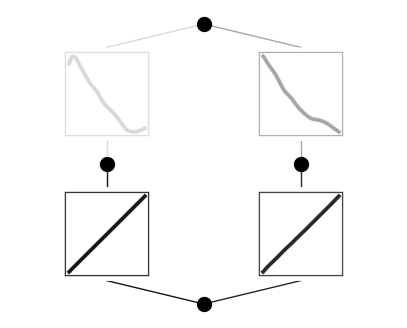

In [556]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [563]:
model.auto_symbolic(lib=["x","x^2","gaussian","sin"])
training=model.train(dataset,opt="LBFGS", steps=50, lamb=0.01, lamb_entropy=0.1)

fixing (0,0,0) with x, r2=0.9999978461443879
fixing (0,0,1) with x, r2=0.9999480272155534
fixing (0,0,2) with x, r2=0.9999970958732063
fixing (1,0,0) with x, r2=0.9589844184762455
fixing (1,1,0) with x, r2=0.9374429492903054
fixing (1,2,0) with gaussian, r2=0.9058528475185311


train loss: 9.37e-01 | test loss: 9.37e-01 | reg: 6.01e+01 : 100%|██| 50/50 [00:27<00:00,  1.82it/s]


function , r2
tan , 0.7361744428143568
sgn , 0.287278984094019
1/x^4 , 0.12124926928640782
arctan , 0.09664615110160786
1/x , 0.09659901371629485


('tan',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.7361744428143568)

In [471]:
training=model.train(dataset,opt="LBFGS", steps=20)

train loss: 9.72e-01 | test loss: 9.72e-01 | reg: 1.98e+01 : 100%|██| 20/20 [00:01<00:00, 12.93it/s]


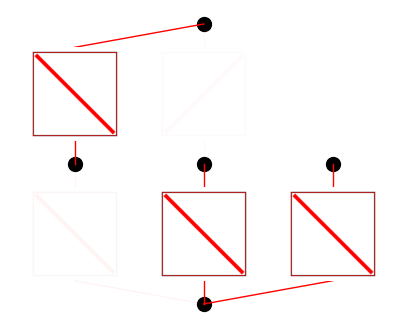

In [564]:
model.plot()

In [565]:
formula, variables = model.symbolic_formula()
formula[0]


-0.16*x_1 + 35.8 + 59.27*exp(-0.07*(0.04*x_1 + 1)**2)

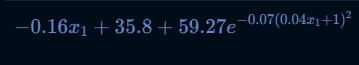

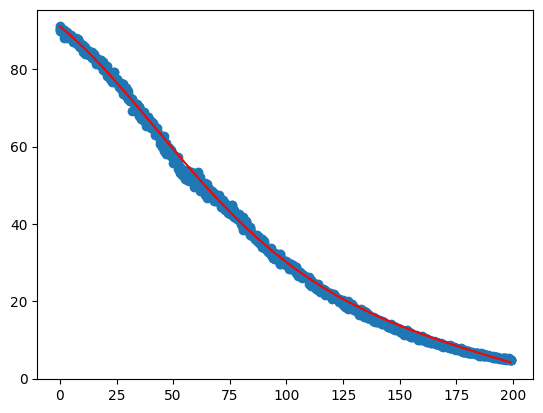

In [567]:
x_1=np.arange(200)
line=-0.16*x_1 + 35.8 + 59.27*np.exp(-0.07*(0.04*x_1 + 1)**2)
import matplotlib.pyplot as plt
plt.scatter(donated,avgs)
plt.plot(range(len(line)), line, label='Function',color="red")
